In [1]:
# Importing libraries
from sklearn.cluster import KMeans
import pandas as pd
import ipaddress
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Charger le fichier CSV dans un DataFrame en spécifiant l'encodage
df = pd.read_csv("Authentification VPN.csv", delimiter=';', encoding='latin-1')

# Afficher les premières lignes du DataFrame
df.head()

Adresse-IP-source GeoLocation-source Nom-utilisateur  \
0       147.161.1.1              Spain    a.safieddine   
1       147.161.1.2              Spain          h.sbaa   
2       147.161.1.3              Spain       m.lahrizi   
3       147.161.1.4              India         r.vemaa   
4       147.161.1.4              India         r.vemaa   

  Date-detection-comportement     Description-comportement  
0            09/03/2023 08:47  Authentification Hors Maroc  
1            09/03/2023 08:33  Authentification Hors Maroc  
2            09/03/2023 07:59  Authentification Hors Maroc  
3            09/03/2023 06:59  Authentification Hors Maroc  
4            09/03/2023 06:36  Authentification Hors Maroc

In [3]:
# Sélectionner les colonnes pertinentes pour le clustering
# Assurez-vous d'adapter les noms de colonnes en fonction de votre jeu de données
selected_columns = ['Adresse-IP-source', 'GeoLocation-source', 'Nom-utilisateur', 'Description-comportement']
data = df[selected_columns]

In [4]:
# Converting data into numeric
data['Adresse-IP-source'] = data['Adresse-IP-source'].apply(lambda x: int(ipaddress.ip_address(x)))

# Apply label encoding to the remaining columns
label_encoder = LabelEncoder()

data['GeoLocation-source'] = label_encoder.fit_transform(data['GeoLocation-source'])
data['Nom-utilisateur'] = label_encoder.fit_transform(data['Nom-utilisateur'])
data['Description-comportement'] = label_encoder.fit_transform(data['Description-comportement'])

In [5]:
#Printing clean data
data.head()

Adresse-IP-source  GeoLocation-source  Nom-utilisateur  \
0         2476802305                   2                4   
1         2476802306                   2               10   
2         2476802307                   2               16   
3         2476802308                   0               21   
4         2476802308                   0               21   

   Description-comportement  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0

In [ ]:
elbow

In [6]:
# Définir le nombre de clusters
num_clusters = 3

# Créer une instance de KMeans
kmeans = KMeans(n_clusters=num_clusters)

# Appliquer l'algorithme K-means sur les données
kmeans.fit(data)

# Obtenir les étiquettes de cluster et les centres de cluster
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
data['cluster'] = labels

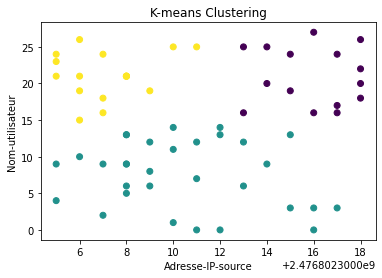

In [7]:
# Visualize the clusters
# Create a scatter plot of the clustered data points
plt.scatter(data['Adresse-IP-source'], data['Nom-utilisateur'], c=data['cluster'])
plt.xlabel('Adresse-IP-source')
plt.ylabel('Nom-utilisateur')
plt.title('K-means Clustering')
plt.show()

In [8]:
# Charger le fichier CSV dans un DataFrame en spécifiant l'encodage
df = pd.read_csv("Attaque DDOS.csv", delimiter=';', encoding='latin-1')

# Afficher les premières lignes du DataFrame
df.head()

Adresse-IP-source                                 analyse-reputation   \
0       187.10.21.11    Brazil, Adresse dotée d'une mauvaise réputation   
1       187.10.21.12    Taiwan, Adresse dotée d'une mauvaise réputation   
2       187.10.21.13  United States, Adresse dotée d'une mauvaise ré...   
3       187.10.21.14  South Korea, Adresse dotée d'une mauvaise répu...   
4       187.10.21.14  South Korea, Adresse dotée d'une mauvaise répu...   

  Adresse-IP-destination  Date-detection-comportement  \
0             41.37.17.73            09/03/2023 07:52   
1             41.37.17.73            09/03/2023 07:49   
2             41.37.17.73            09/03/2023 06:38   
3             41.37.17.73            09/03/2023 05:42   
4             41.37.17.73            09/03/2023 05:37   

  Description-comportement Type-comportement  
0             DDoS Botnets      Faux positif  
1             DDoS Botnets      Faux positif  
2             DDoS Botnets      Faux positif  
3             DDoS Botnets      Faux positif  
4             DDoS Botnets      Faux positif

In [9]:
# Sélectionner les colonnes pertinentes pour le clustering
# Assurez-vous d'adapter les noms de colonnes en fonction de votre jeu de données
selected_columns = df.columns.tolist()
data = df[selected_columns]

In [10]:
# Converting data into numeric
#NOTE : To convert IP addresses to numeric format, they must be valid IPv4 addresses. 
#If you encounter invalid IP addresses like this, you'll need to correct or remove them before proceeding with the conversion.
# Apply label encoding to the remaining columns
label_encoder = LabelEncoder()
data['analyse-reputation '] = label_encoder.fit_transform(data['analyse-reputation '])
data['Date-detection-comportement'] = label_encoder.fit_transform(data['Date-detection-comportement'])
data['Description-comportement'] = label_encoder.fit_transform(data['Description-comportement'])
data['Type-comportement'] = label_encoder.fit_transform(data['Type-comportement'])
data.drop(["Adresse-IP-source ","Adresse-IP-destination "],axis=1,inplace = True)

In [11]:
#Printing clean data
data.head()

analyse-reputation   Date-detection-comportement  Description-comportement  \
0                   37                          323                         1   
1                   44                          320                         1   
2                   46                          283                         1   
3                   43                          260                         1   
4                   43                          258                         1   

   Type-comportement  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [12]:
# Définir le nombre de clusters
num_clusters = 3

# Créer une instance de KMeans
kmeans = KMeans(n_clusters=num_clusters)

# Appliquer l'algorithme K-means sur les données
kmeans.fit(data)

# Obtenir les étiquettes de cluster et les centres de cluster
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
data['cluster'] = labels

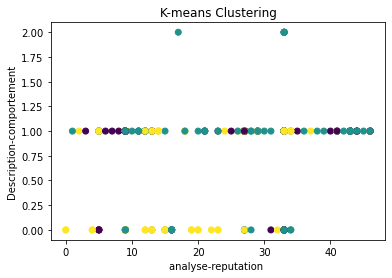

In [13]:
# Visualize the clusters
# Create a scatter plot of the clustered data points
plt.scatter(data['analyse-reputation '], data['Description-comportement'], c=data['cluster'])
plt.xlabel('analyse-reputation ')
plt.ylabel('Description-comportement')
plt.title('K-means Clustering')
plt.show()

In [14]:
# Charger le fichier CSV dans un DataFrame en spécifiant l'encodage
df = pd.read_csv("Attaques hors portail.csv", delimiter=';', encoding='latin-1')

# Afficher les premières lignes du DataFrame
df.head()

Adresse-IP-source     Reputation-Ip-source Adresse-IP-destination  \
0         10.2.5.06  Simple authentification              100.01.02   
1         10.2.5.06  Simple authentification              100.01.03   
2         10.2.5.06  Simple authentification              100.01.04   
3         10.2.5.09  Simple authentification              100.01.05   
4         10.2.5.10  Simple authentification              100.01.06   

  Details-IP-destination Signature  occurrence Date-debut-comportement  \
0     Adresse du portail       RNP         1.0        01/02/2023 00:00   
1     Adresse du réseau        RNP         1.0        02/02/2023 00:00   
2     Adresse du réseau        RNP         1.0        03/02/2023 00:00   
3     Adresse du réseau        RNP         1.0        04/02/2023 00:00   
4     Adresse du réseau        RNP         1.0        05/02/2023 00:00   

  Type-comportement  
0      FAUX POSITIF  
1      FAUX POSITIF  
2      FAUX POSITIF  
3      FAUX POSITIF  
4      FAUX POSITIF

In [15]:
# Sélectionner les colonnes pertinentes pour le clustering
# Assurez-vous d'adapter les noms de colonnes en fonction de votre jeu de données
selected_columns = df.columns.tolist()
data = df[selected_columns]
data.dropna(inplace=True)

In [16]:
# Converting data into numeric
#NOTE : To convert IP addresses to numeric format, they must be valid IPv4 addresses. 
#If you encounter invalid IP addresses like this, you'll need to correct or remove them before proceeding with the conversion.

# Apply label encoding to the remaining columns

label_encoder = LabelEncoder()
data['Reputation-Ip-source'] = label_encoder.fit_transform(data['Reputation-Ip-source'])
data['Details-IP-destination'] = label_encoder.fit_transform(data['Details-IP-destination'])
data['Signature'] = label_encoder.fit_transform(data['Signature'])
data['Type-comportement'] = label_encoder.fit_transform(data['Type-comportement'])

data.drop(["Adresse-IP-source","Adresse-IP-destination","Date-debut-comportement"],axis=1,inplace = True)

In [17]:
data.head()

Reputation-Ip-source  Details-IP-destination  Signature  occurrence  \
0                     0                       0          1         1.0   
1                     0                       1          1         1.0   
2                     0                       1          1         1.0   
3                     0                       1          1         1.0   
4                     0                       1          1         1.0   

   Type-comportement  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [18]:
# Définir le nombre de clusters
num_clusters = 3

# Créer une instance de KMeans
kmeans = KMeans(n_clusters=num_clusters)

# Appliquer l'algorithme K-means sur les données
kmeans.fit(data)

# Obtenir les étiquettes de cluster et les centres de cluster
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
data['cluster'] = labels

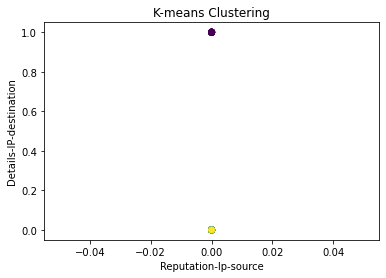

In [19]:
# Visualize the clusters
# Create a scatter plot of the clustered data points
plt.scatter(data['Reputation-Ip-source'], data['Details-IP-destination'], c=data['cluster'])
plt.xlabel('Reputation-Ip-source')
plt.ylabel('Details-IP-destination')
plt.title('K-means Clustering')
plt.show()

In [21]:
# Charger le fichier CSV dans un DataFrame en spécifiant l'encodage
df = pd.read_csv("JIRA.csv", delimiter=';', encoding='latin-1')

# Afficher les premières lignes du DataFrame
df.head()

Etat    Priorite   Responsable      Createur date-creation   \
0  Initié  Priorité 1  bbb@atos.net  aaa@atos.net     18/12/2019   
1  Initié  Priorité 1  bbb@atos.net  aaa@atos.net     19/12/2019   
2  Initié  Priorité 1  bbb@atos.net  aaa@atos.net     20/12/2019   
3  Initié  Priorité 1  bbb@atos.net  aaa@atos.net     21/12/2019   
4  Initié  Priorité 2  bbb@atos.net  aaa@atos.net     22/12/2019   

  date-generation-comportement Temps-prise-en-charge date-resolution  \
0                   20/12/2019            10/01/2023      10/02/2023   
1                   21/12/2019            11/01/2023      11/02/2023   
2                   22/12/2019            12/01/2023      12/02/2023   
3                   23/12/2019            13/01/2023      13/02/2023   
4                   24/12/2019            14/01/2023      14/02/2023   

                                      Statut      Categorie     Sous-Categorie  
0                                Faux positif  Catégorie 1   Sous-catégories 1  
1                                Faux positif   Catégorie 2  Sous-catégories 2  
2                               Incident réel   Catégorie 3  Sous-catégories 3  
3  Faux positif - tuning solution de sécurité   Catégorie 4  Sous-catégories 4  
4                  Faux positif - tuning SIEM   Catégorie 5  Sous-catégories 5

In [22]:
# Sélectionner les colonnes pertinentes pour le clustering
# Assurez-vous d'adapter les noms de colonnes en fonction de votre jeu de données
selected_columns = df.columns.tolist()
data = df[selected_columns]
data.dropna(inplace=True)

In [23]:
data.columns

Index(['Etat', 'Priorite', 'Responsable', 'Createur', 'date-creation ',
       'date-generation-comportement', 'Temps-prise-en-charge',
       'date-resolution', 'Statut ', 'Categorie', 'Sous-Categorie'],
      dtype='object')

In [24]:
# Converting data into numeric
#NOTE : To convert IP addresses to numeric format, they must be valid IPv4 addresses. 
#If you encounter invalid IP addresses like this, you'll need to correct or remove them before proceeding with the conversion.

# Apply label encoding to the remaining columns

label_encoder = LabelEncoder()
data['Etat'] = label_encoder.fit_transform(data['Etat'])
data['Priorite'] = label_encoder.fit_transform(data['Priorite'])
data['Responsable'] = label_encoder.fit_transform(data['Responsable'])
data['Createur'] = label_encoder.fit_transform(data['Createur'])
data['Statut '] = label_encoder.fit_transform(data['Statut '])
data['Categorie'] = label_encoder.fit_transform(data['Categorie'])
data['Sous-Categorie'] = label_encoder.fit_transform(data['Sous-Categorie'])

data.drop(["date-creation ","date-generation-comportement","date-resolution","Temps-prise-en-charge"],axis=1,inplace = True)

In [25]:
data.head()

Etat  Priorite  Responsable  Createur  Statut   Categorie  Sous-Categorie
0     4         0            1         0        1          0               0
1     4         0            1         0        1         11              11
2     4         0            1         0        4         12              12
3     4         0            1         0        3         13              13
4     4         1            1         0        2         14              14

In [26]:
# Définir le nombre de clusters
num_clusters = 3

# Créer une instance de KMeans
kmeans = KMeans(n_clusters=num_clusters)

# Appliquer l'algorithme K-means sur les données
kmeans.fit(data)

# Obtenir les étiquettes de cluster et les centres de cluster
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
data['cluster'] = labels

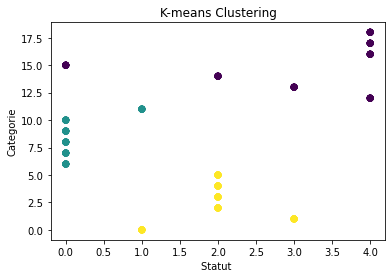

In [27]:
# Visualize the clusters
# Create a scatter plot of the clustered data points
plt.scatter(data['Statut '], data['Categorie'], c=data['cluster'])
plt.xlabel('Statut ')
plt.ylabel('Categorie')
plt.title('K-means Clustering')
plt.show()

In [28]:
# Charger le fichier CSV dans un DataFrame en spécifiant l'encodage
df = pd.read_csv("Mail.csv", delimiter=';', encoding='latin-1')

# Afficher les premières lignes du DataFrame
df.head()

Adresse-IP-source Adresse-IP-destination geolocalisation-source  \
0         123.02.05               10.12.14                Morocco   
1         123.02.05               10.12.15                Morocco   
2         123.02.05               10.12.16                Morocco   
3         123.02.05               10.12.17                Morocco   
4         123.02.05               10.12.18                Morocco   

  geolocalisation-destination Date-debut-comportement Type-comportement  \
0                       Spain              12/01/2023      faux positif   
1                       Spain              13/01/2023      faux positif   
2                       Spain              14/01/2023      faux positif   
3                       Spain              15/01/2023      faux positif   
4                       Spain              16/01/2023      faux positif   

  Description-comportement  
0             Accés limité  
1             Accés limité  
2             Accés limité  
3             Accés limité  
4             Accés limité

In [29]:
# Sélectionner les colonnes pertinentes pour le clustering
# Assurez-vous d'adapter les noms de colonnes en fonction de votre jeu de données
selected_columns = df.columns.tolist()
data = df[selected_columns]
data.dropna(inplace=True)

In [30]:
data.columns

Index(['Adresse-IP-source', 'Adresse-IP-destination', 'geolocalisation-source',
       'geolocalisation-destination', 'Date-debut-comportement',
       'Type-comportement', 'Description-comportement'],
      dtype='object')

In [31]:
# Converting data into numeric
#NOTE : To convert IP addresses to numeric format, they must be valid IPv4 addresses. 
#If you encounter invalid IP addresses like this, you'll need to correct or remove them before proceeding with the conversion.

# Apply label encoding to the remaining columns

label_encoder = LabelEncoder()
data['geolocalisation-source'] = label_encoder.fit_transform(data['geolocalisation-source'])
data['Type-comportement'] = label_encoder.fit_transform(data['Type-comportement'])
data['geolocalisation-destination'] = label_encoder.fit_transform(data['geolocalisation-destination'])
data['Description-comportement'] = label_encoder.fit_transform(data['Description-comportement'])

data.drop(["Adresse-IP-source","Adresse-IP-destination","Date-debut-comportement"],axis=1,inplace = True)

In [32]:
# Définir le nombre de clusters
num_clusters = 3

# Créer une instance de KMeans
kmeans = KMeans(n_clusters=num_clusters)

# Appliquer l'algorithme K-means sur les données
kmeans.fit(data)

# Obtenir les étiquettes de cluster et les centres de cluster
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
data['cluster'] = labels

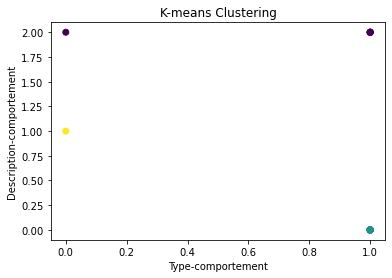

In [33]:
# Visualize the clusters
# Create a scatter plot of the clustered data points
plt.scatter(data['Type-comportement'], data['Description-comportement'], c=data['cluster'])
plt.xlabel('Type-comportement')
plt.ylabel('Description-comportement')
plt.title('K-means Clustering')
plt.show()

In [34]:
# Charger le fichier CSV dans un DataFrame en spécifiant l'encodage
df = pd.read_csv("proxy.csv", delimiter=';', encoding='latin-1')

# Afficher les premières lignes du DataFrame
df.head()

Adresse-IP-Source Geolocalisation-IP-Source Adresse-IP-destination  \
0           123.4.6                     Maroc              126.01.08   
1           123.4.6                     Maroc              126.01.09   
2           123.4.6                     Maroc              126.01.10   
3           123.4.6                     Maroc              126.01.11   
4           123.4.6                     Maroc              126.01.12   

  geolocalisation-IP-destination date-detection-comportement  \
0                          Dubai            02/02/2022 00:00   
1                          Dubai            03/02/2022 00:00   
2                          Dubai            04/02/2022 00:00   
3                          Dubai            05/02/2022 00:00   
4                          Dubai            06/02/2022 00:00   

               Description-comportement Type-comportement  
0  Accés limité après authentification       faux positif  
1  Accés limité après authentification       faux positif  
2  Accés limité après authentification       faux positif  
3  Accés limité après authentification       faux positif  
4  Accés limité après authentification       faux positif

In [35]:
# Sélectionner les colonnes pertinentes pour le clustering
# Assurez-vous d'adapter les noms de colonnes en fonction de votre jeu de données
selected_columns = df.columns.tolist()
data = df[selected_columns]
data.dropna(inplace=True)

In [36]:
data.columns

Index(['Adresse-IP-Source', 'Geolocalisation-IP-Source',
       'Adresse-IP-destination', 'geolocalisation-IP-destination',
       'date-detection-comportement', 'Description-comportement',
       'Type-comportement'],
      dtype='object')

In [37]:
# Converting data into numeric
#NOTE : To convert IP addresses to numeric format, they must be valid IPv4 addresses. 
#If you encounter invalid IP addresses like this, you'll need to correct or remove them before proceeding with the conversion.

# Apply label encoding to the remaining columns

label_encoder = LabelEncoder()
data['Geolocalisation-IP-Source'] = label_encoder.fit_transform(data['Geolocalisation-IP-Source'])
data['geolocalisation-IP-destination'] = label_encoder.fit_transform(data['geolocalisation-IP-destination'])
data['Description-comportement'] = label_encoder.fit_transform(data['Description-comportement'])
data['Type-comportement'] = label_encoder.fit_transform(data['Type-comportement'])

data.drop(["Adresse-IP-Source","Adresse-IP-destination","date-detection-comportement"],axis=1,inplace = True)

In [38]:
data.head()

Geolocalisation-IP-Source  geolocalisation-IP-destination  \
0                          1                               0   
1                          1                               0   
2                          1                               0   
3                          1                               0   
4                          1                               0   

   Description-comportement  Type-comportement  
0                         0                  1  
1                         0                  1  
2                         0                  1  
3                         0                  1  
4                         0                  1

In [39]:
# Définir le nombre de clusters
num_clusters = 3

# Créer une instance de KMeans
kmeans = KMeans(n_clusters=num_clusters)

# Appliquer l'algorithme K-means sur les données
kmeans.fit(data)

# Obtenir les étiquettes de cluster et les centres de cluster
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Add the cluster labels to the DataFrame
data['cluster'] = labels

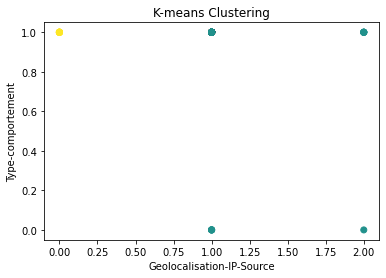

In [40]:
# Visualize the clusters
# Create a scatter plot of the clustered data points
plt.scatter(data['Geolocalisation-IP-Source'], data['Type-comportement'], c=data['cluster'])
plt.xlabel('Geolocalisation-IP-Source')
plt.ylabel('Type-comportement')
plt.title('K-means Clustering')
plt.show()